In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
models = [*filter(lambda z: os.path.exists(os.path.join('workspace','exported_models', z, 'validation_results.csv')), os.listdir('workspace/exported_models'))]

In [3]:
for index,item in enumerate(models):
    print(index,item, sep=": ")

0: centernet_resnet50_v1_fpn_512x512_coco17_tpu-8
1: centernet_resnet50_v2_512x512_coco17_tpu-8
2: faster_rcnn_resnet152_v1_640x640_coco17_tpu-8
3: faster_rcnn_resnet50_v1_640x640_coco17_tpu-8
4: ssd_resnet101_v1_fpn_640x640_coco17_tpu-8
5: ssd_resnet152_v1_fpn_640x640_coco17_tpu-8
6: ssd_resnet50_v1_fpn_640x640_coco17_tpu-8


In [4]:
def generate_fig(modelname):
    results = pd.read_csv(f"workspace/exported_models/{modelname}/validation_results.csv")
    results["original_class"] = results["image"].apply(lambda z: z[:-9])
    results["class_is_best"] = results["best_class"] == results["original_class"]
    agg_dict = {
        "class_present": lambda z: z.sum(),
        "class_is_best": lambda z: z.sum()
    }
    grouped = results.groupby("original_class", as_index=False).agg(agg_dict)

    figure = plt.figure(figsize=(24,12))
    plt.title(f"{modelname} - Liczba detekcji dla klasy")
    bar1 = plt.bar(grouped['original_class'], grouped['class_present'], label="Oryginalna klasa na liście wykrytych klas")
    bar2 = plt.bar(grouped['original_class'], grouped['class_is_best'], label="Oryginalna klasa ma najwyższy wynik")
    plt.legend(handles=[bar1,bar2])
    figure.autofmt_xdate(rotation=90, ha='center')
    plt.grid(axis='y')
    plt.savefig(f"workspace/exported_models/{modelname}/figure.png", pad_inches=0.1, dpi=300, bbox_inches='tight')

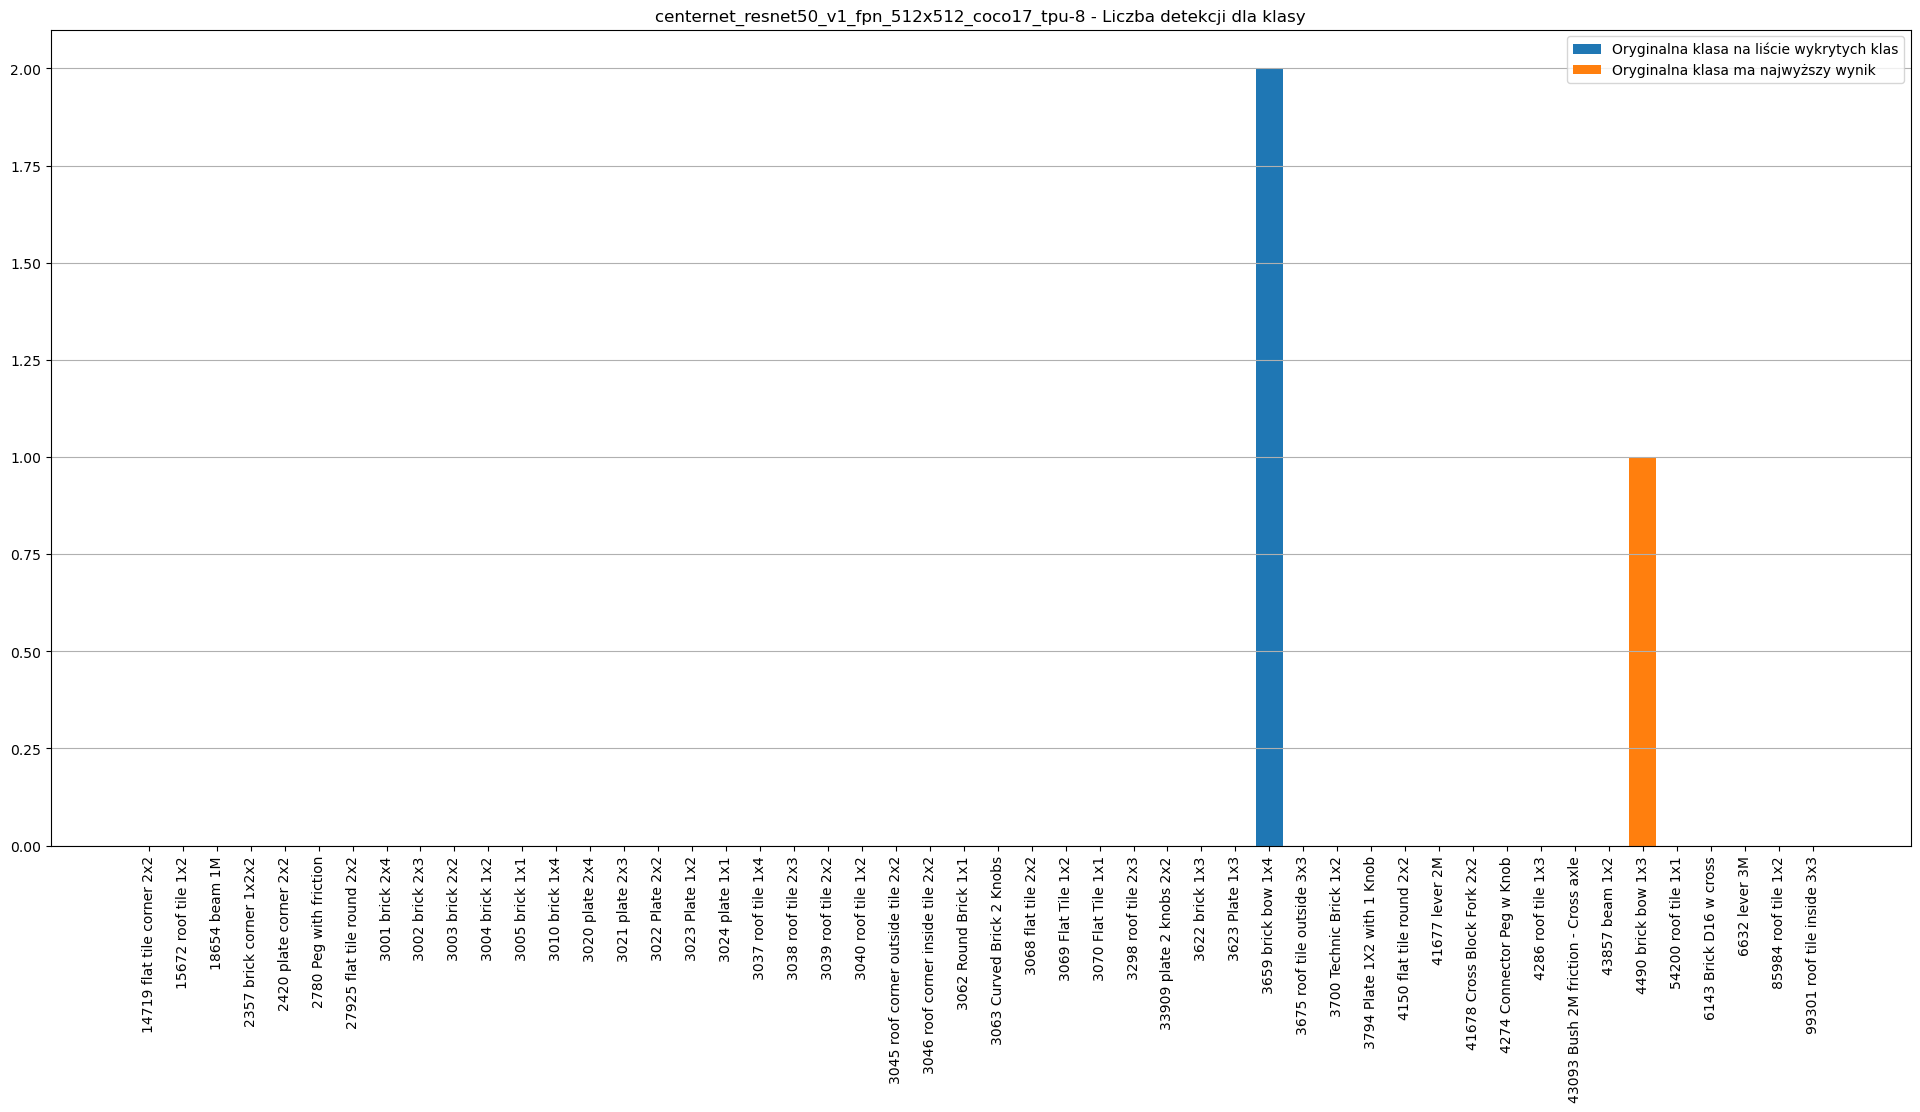

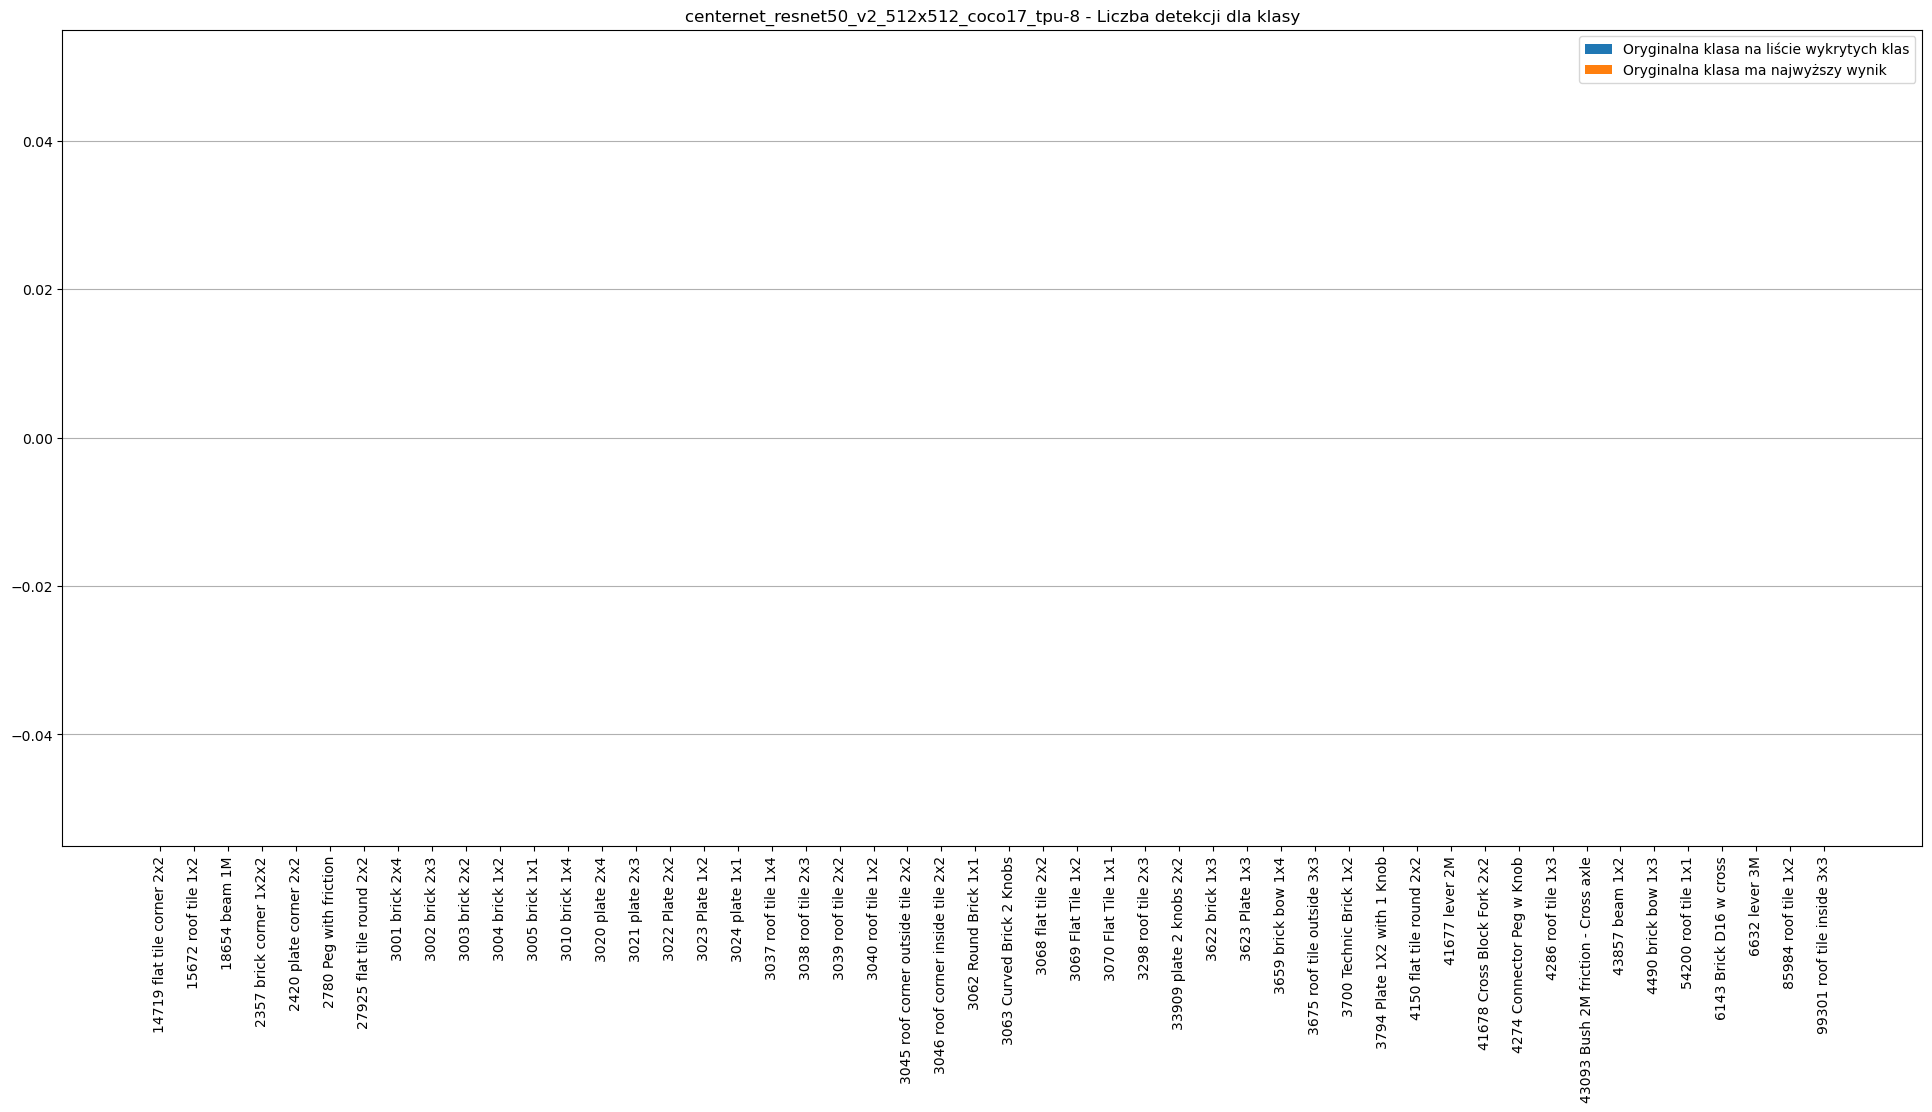

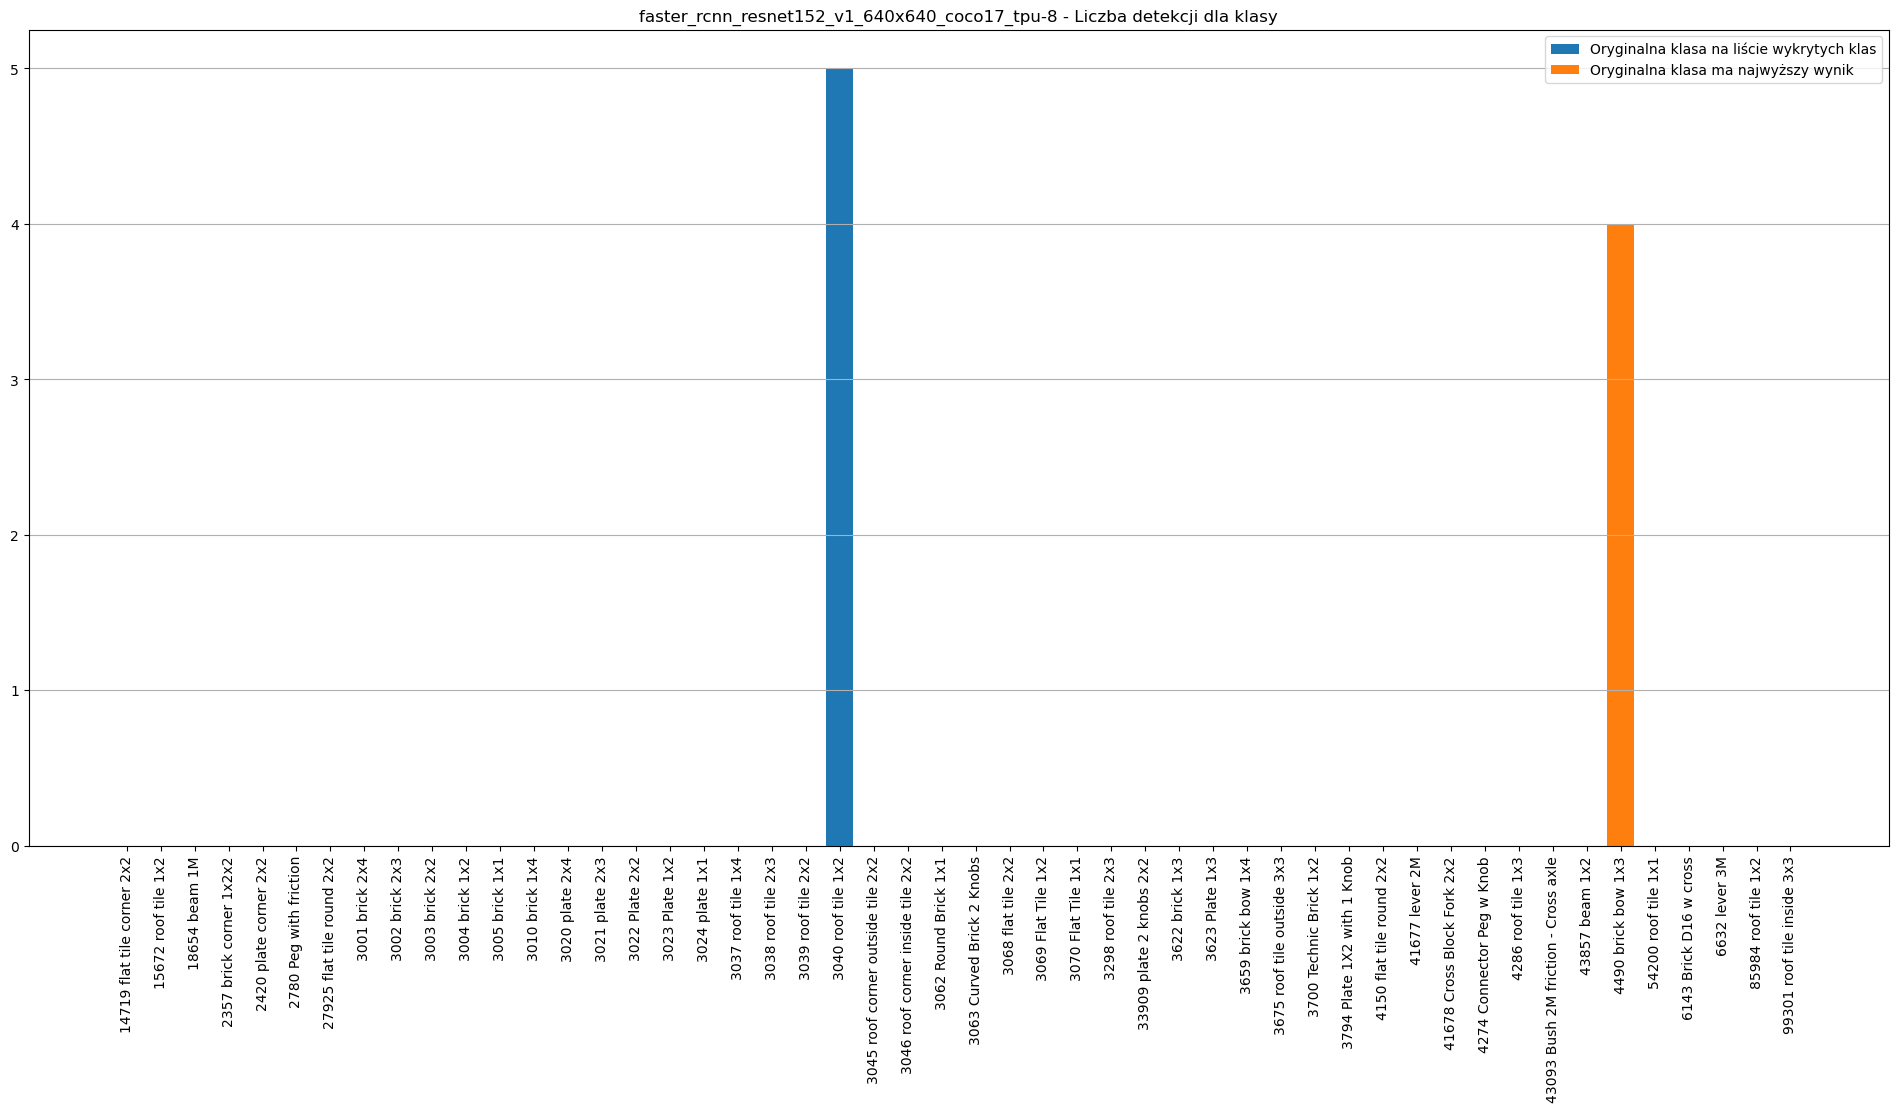

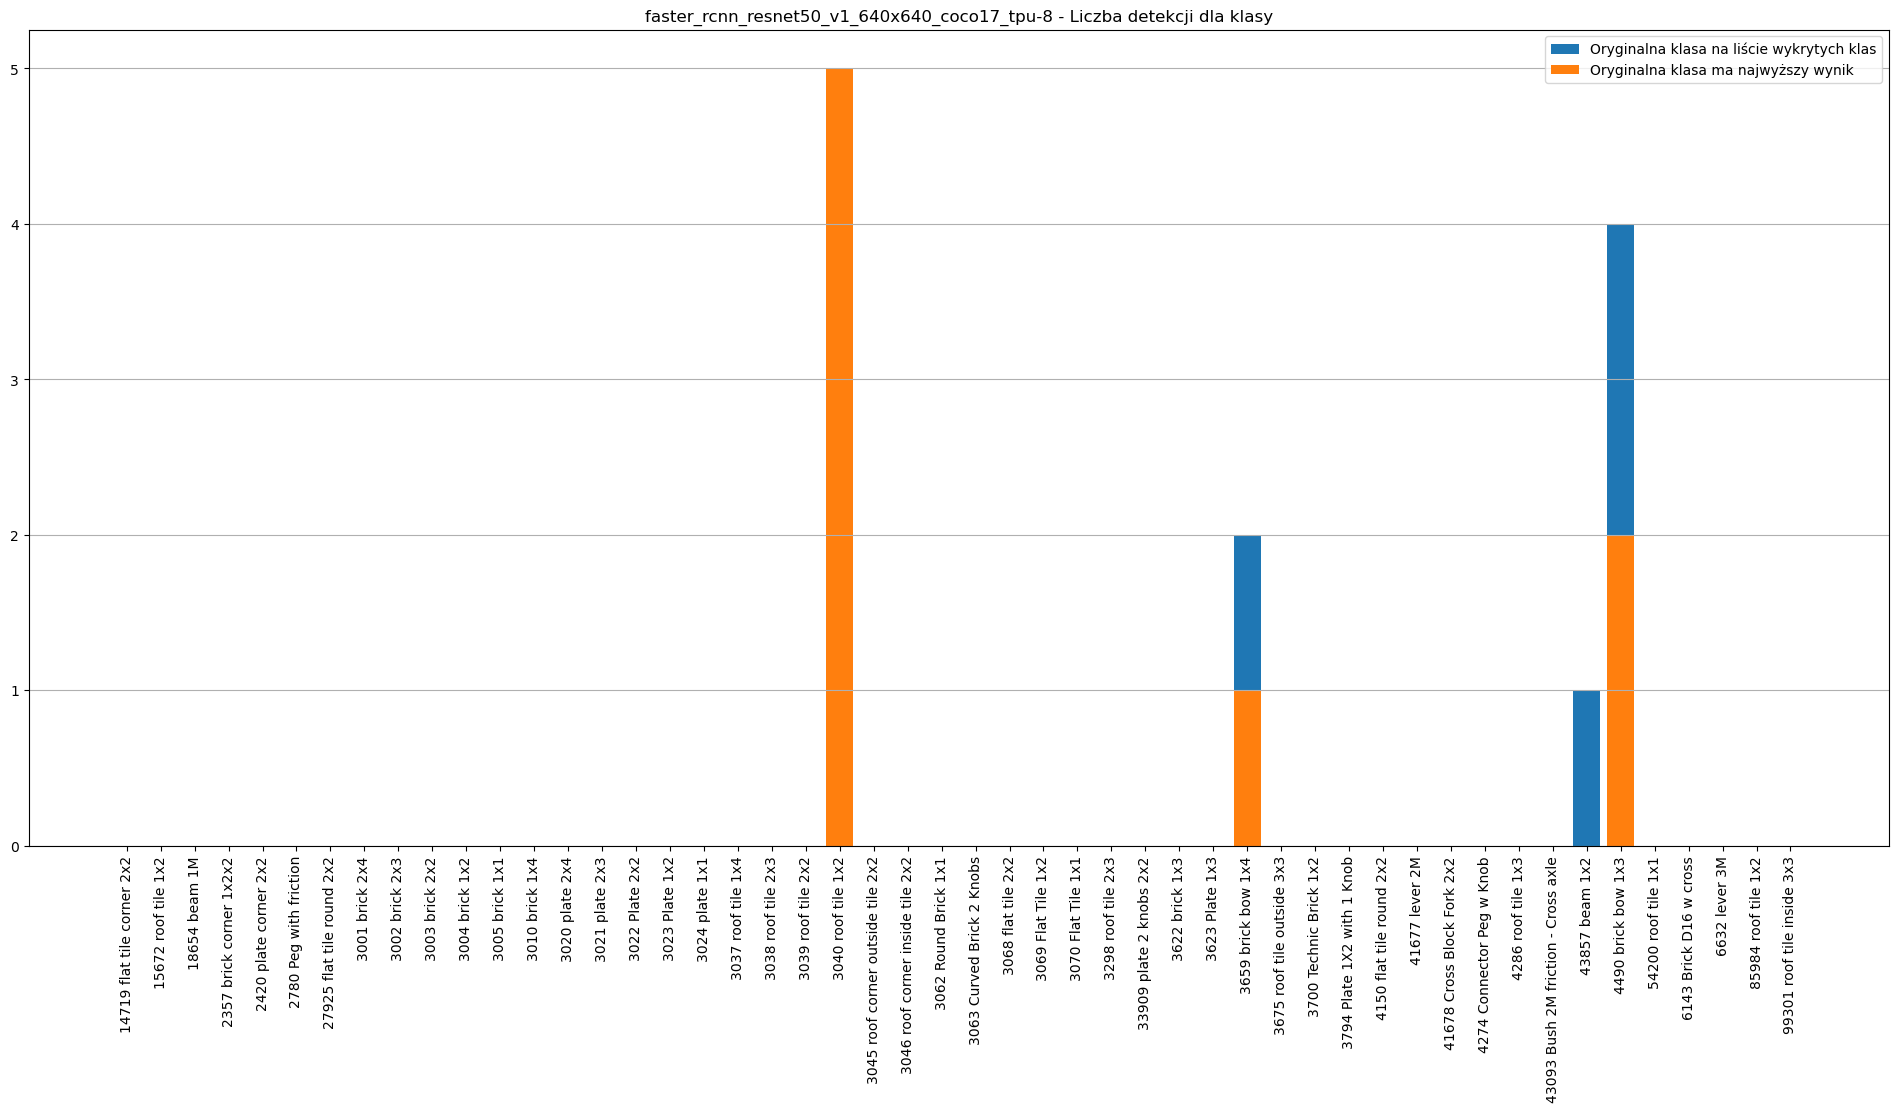

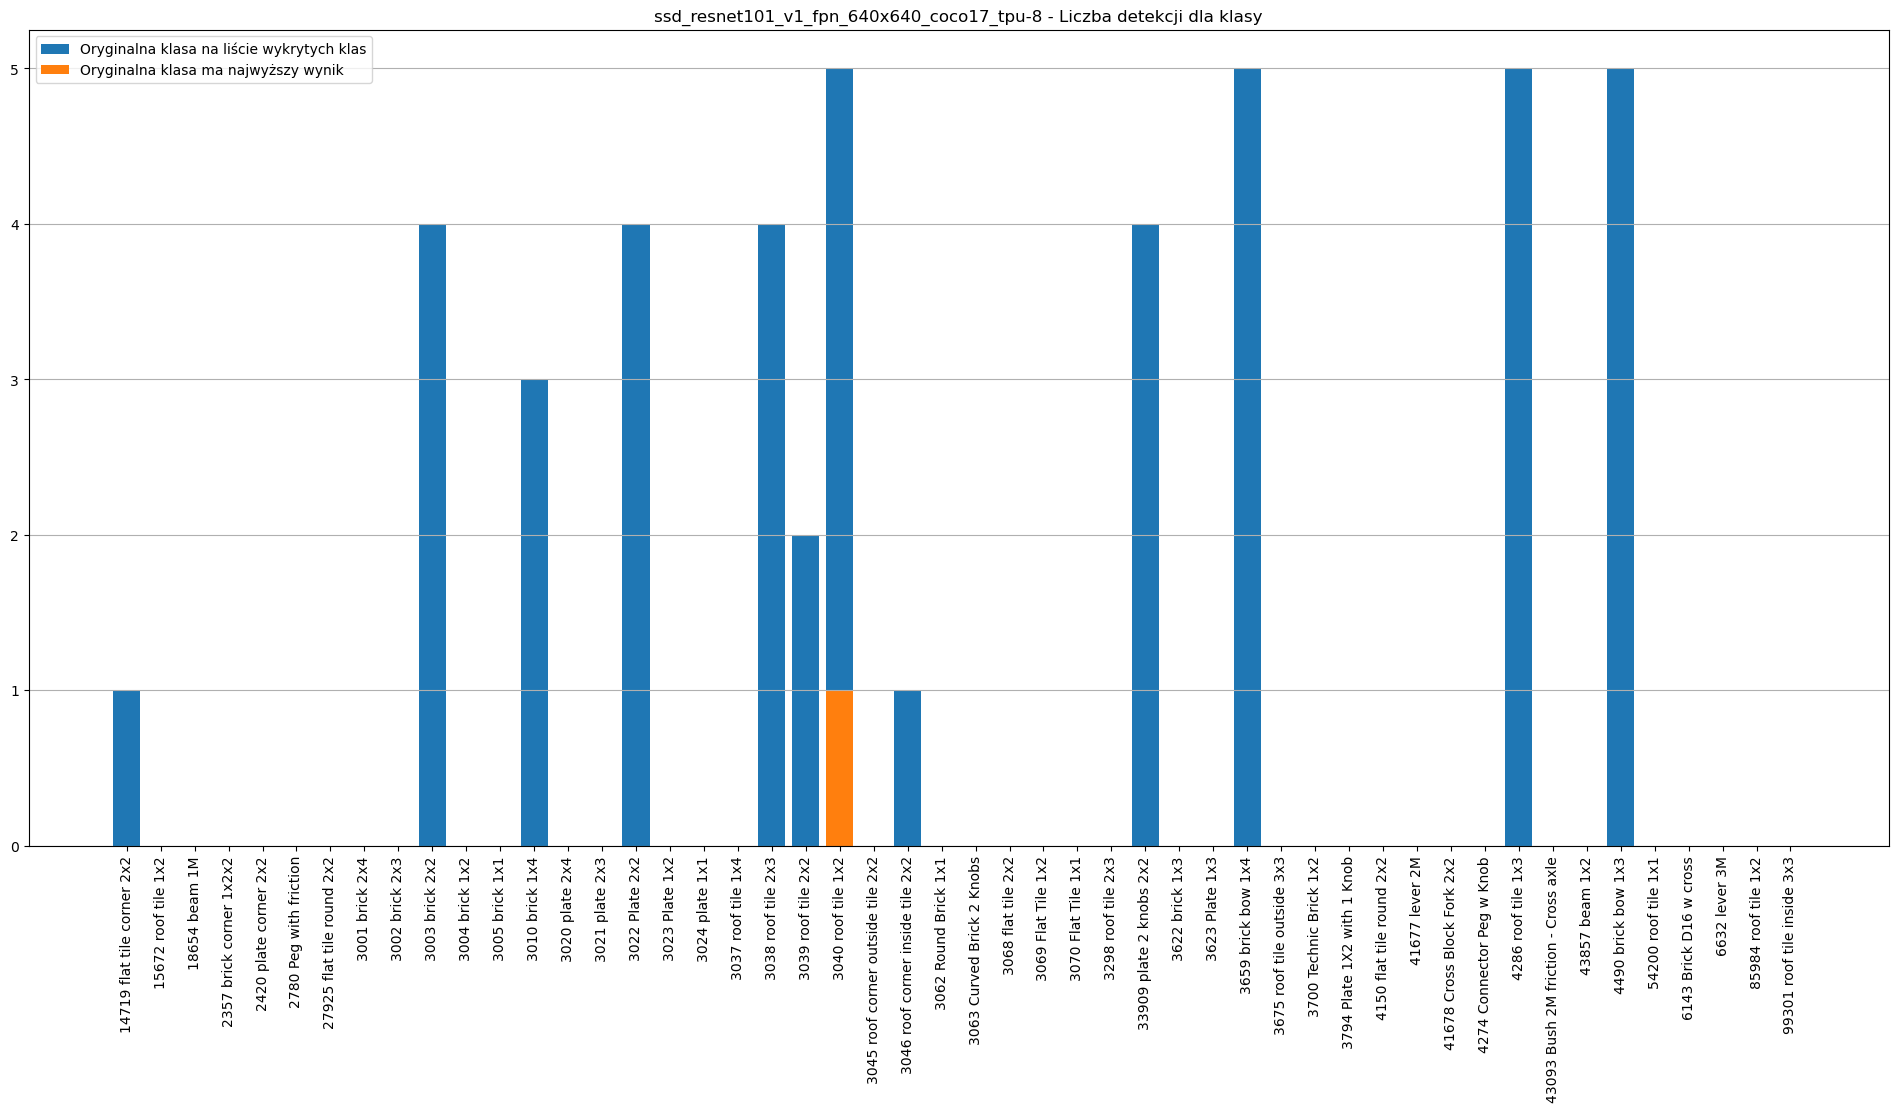

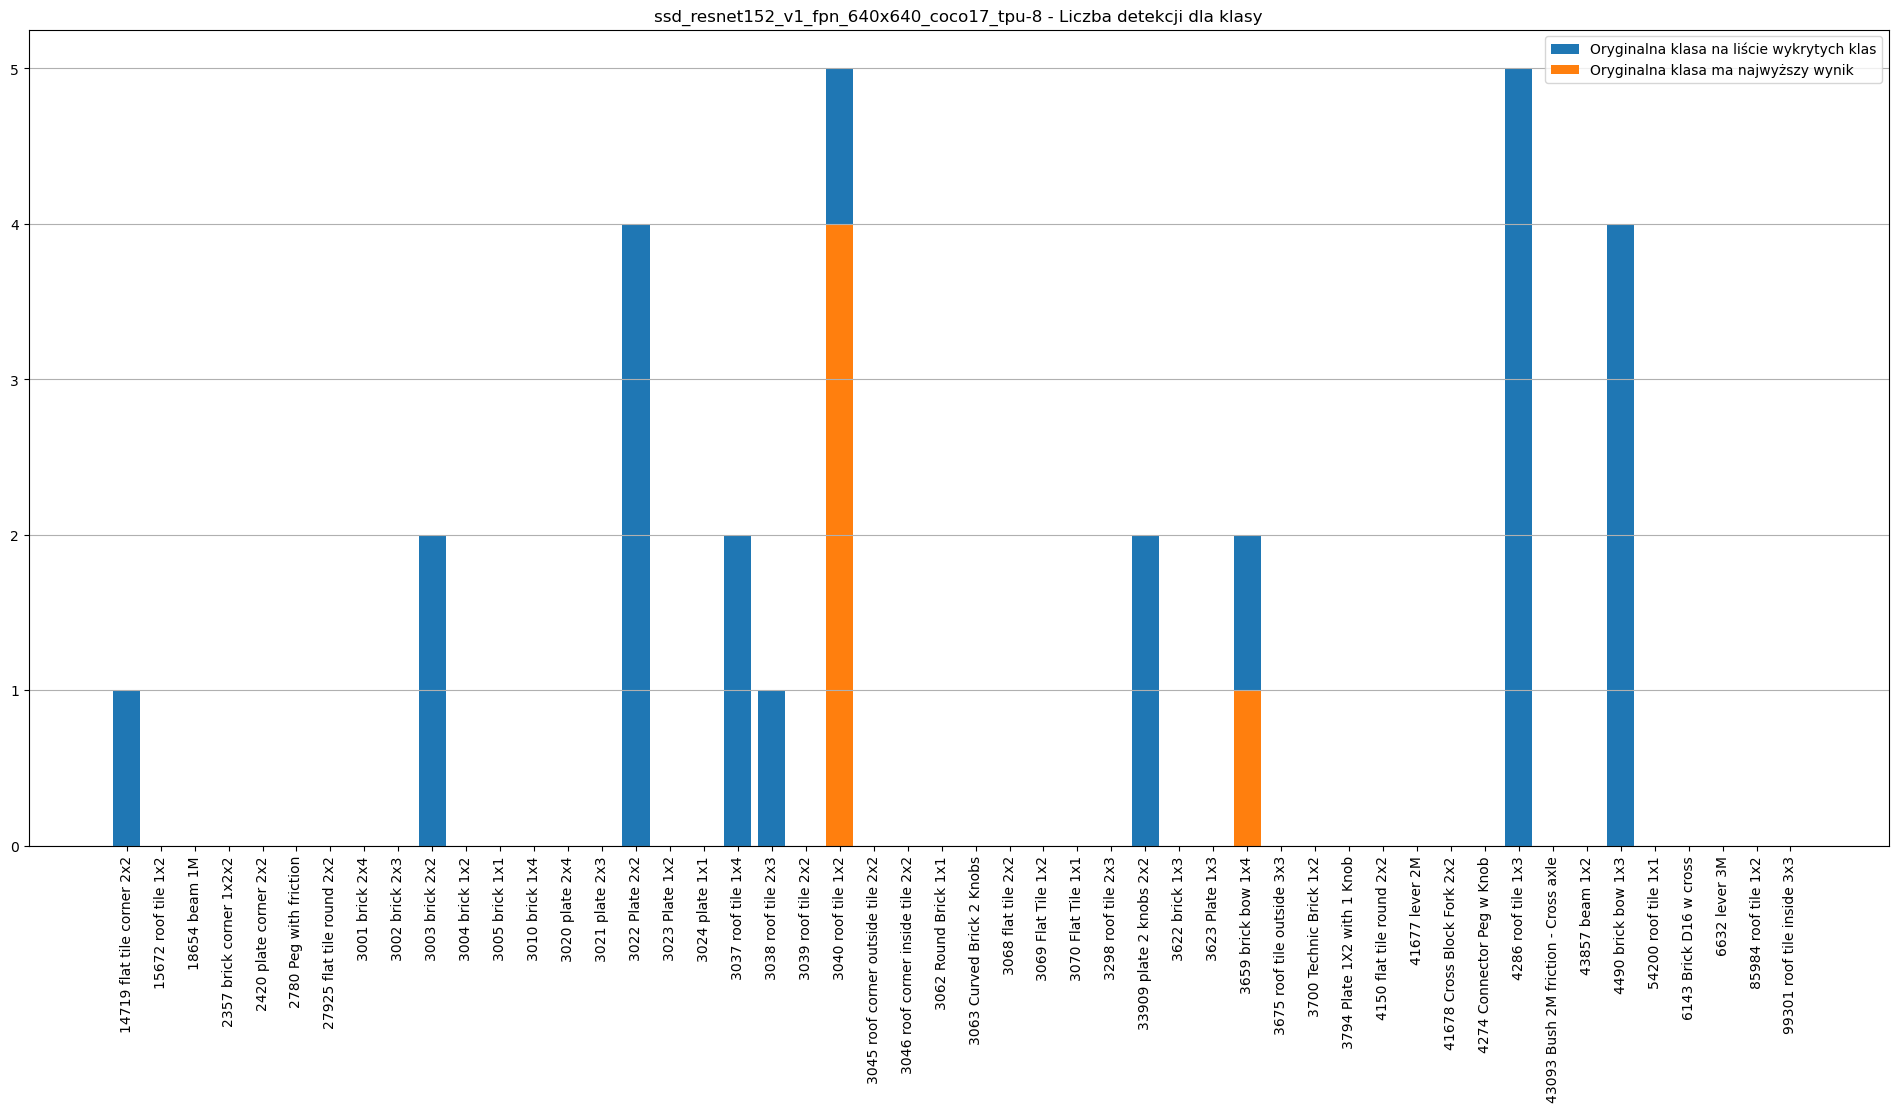

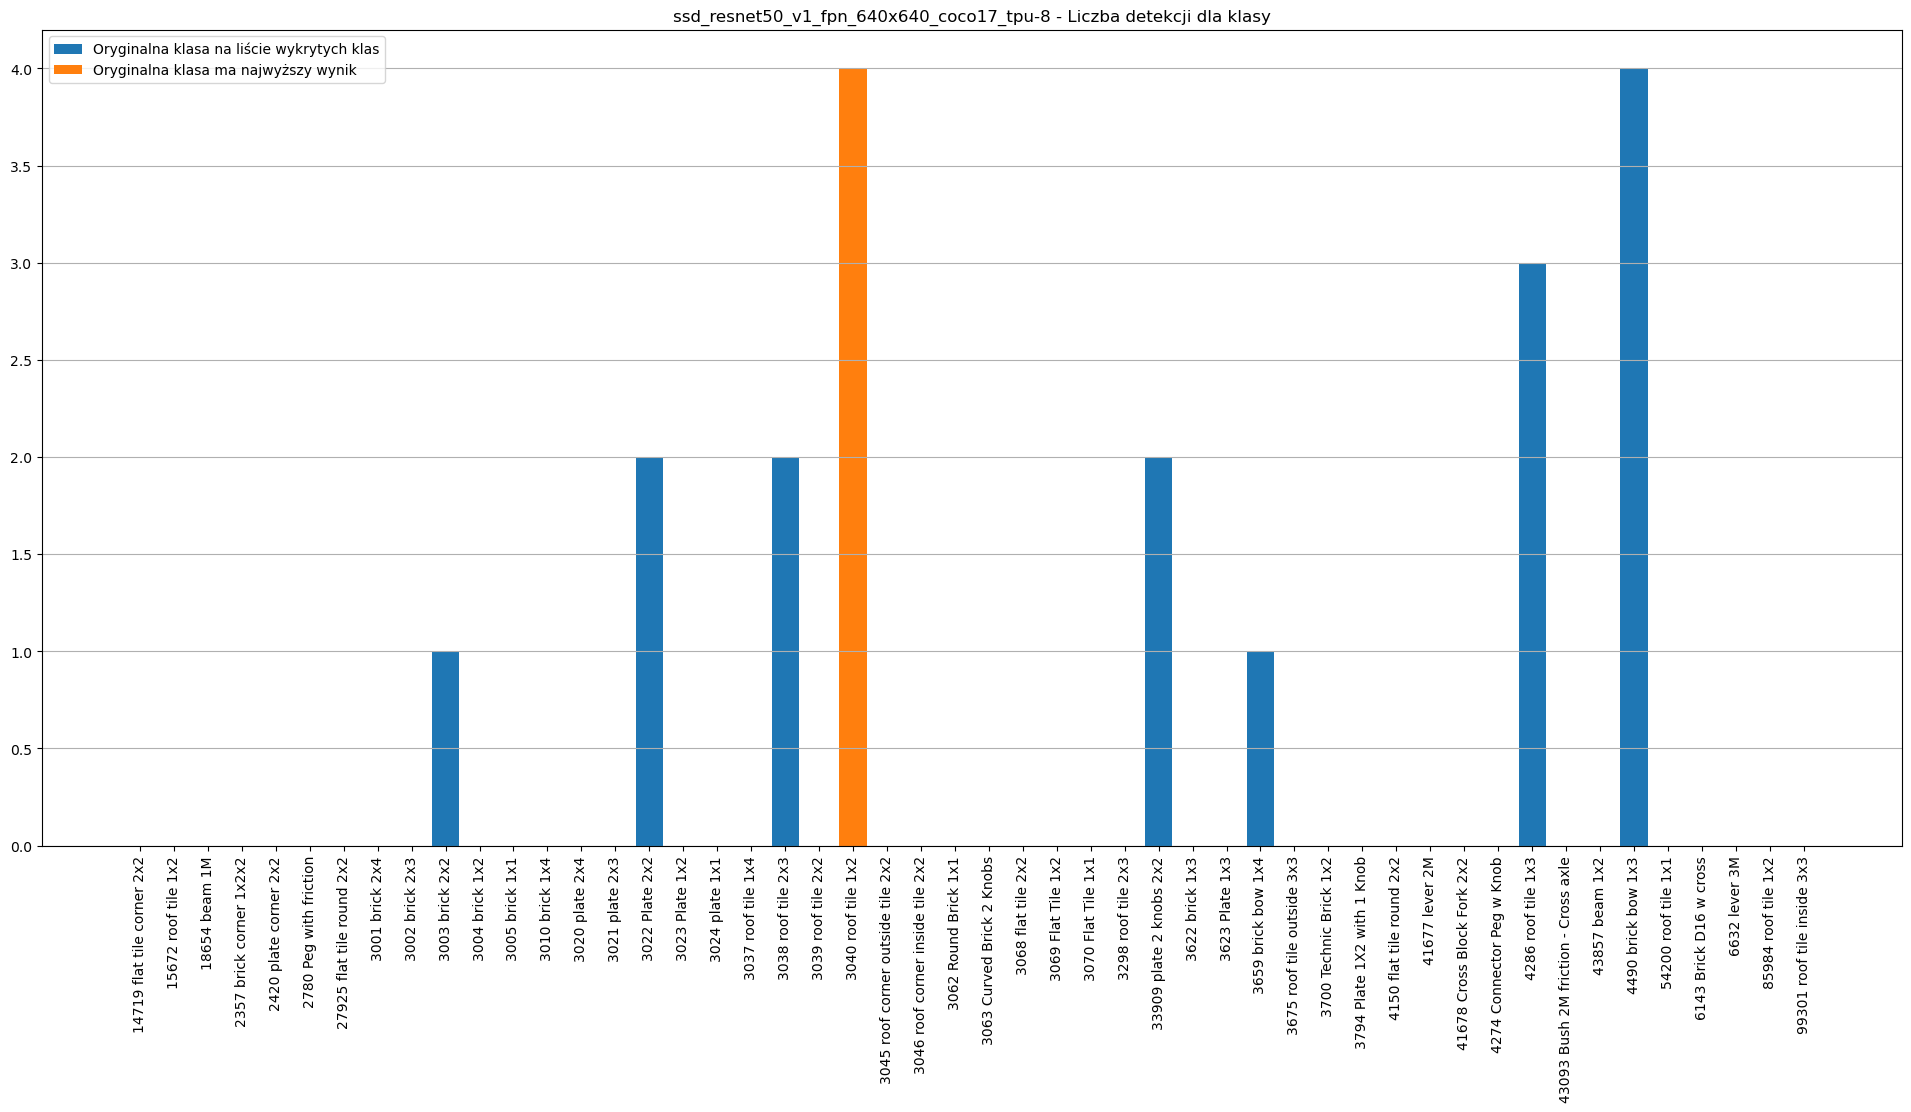

In [5]:
for model in models:
    generate_fig(model)

In [36]:
results = pd.read_csv(f"workspace/exported_models/{models[5]}/validation_results.csv")
results["original_class"] = results["image"].apply(lambda z: z[:-9])
results["class_is_best"] = results["best_class"] == results["original_class"]

In [27]:
results

,image,time,boxes,best,best_class,class_present,class_score,original_class,class_is_best
0,2357 brick corner 1x2x2 000L.jpg,8927.520,"[[104, 175, 534, 523, '3040 roof tile 1x2', 0....",0.328484,3040 roof tile 1x2,False,NaN,2357 brick corner 1x2x2,False
1,2357 brick corner 1x2x2 002L.jpg,501.369,"[[115, 167, 574, 532, '3040 roof tile 1x2', 0....",0.293524,3040 roof tile 1x2,False,NaN,2357 brick corner 1x2x2,False
2,2357 brick corner 1x2x2 011R.jpg,401.058,"[[123, 137, 506, 497, '3040 roof tile 1x2', 0....",0.279009,3040 roof tile 1x2,False,NaN,2357 brick corner 1x2x2,False
3,2357 brick corner 1x2x2 046R.jpg,363.306,"[[156, 126, 467, 493, '3040 roof tile 1x2', 0....",0.265362,3040 roof tile 1x2,False,NaN,2357 brick corner 1x2x2,False
4,2357 brick corner 1x2x2 052R.jpg,432.363,"[[120, 159, 485, 494, '4490 brick bow 1x3', 0....",0.263298,4490 brick bow 1x3,False,NaN,2357 brick corner 1x2x2,False
...,...,...,...,...,...,...,...,...,...
245,99301 roof tile inside 3x3 001L.jpg,285.169,"[[57, 0, 638, 640, '3040 roof tile 1x2', 0.228...",0.228885,3040 roof tile 1x2,False,NaN,99301 roof tile inside 3x3,False
246,99301 roof tile inside 3x3 004R.jpg,278.668,"[[20, 24, 628, 594, '3040 roof tile 1x2', 0.20...",0.202949,3040 roof tile 1x2,False,NaN,99301 roof tile inside 3x3,False
247,99301 roof tile inside 3x3 005L.jpg,269.384,"[[21, 71, 631, 593, '3040 roof tile 1x2', 0.29...",0.291984,3040 roof tile 1x2,False,NaN,99301 roof tile inside 3x3,False
248,99301 roof tile inside 3x3 022R.jpg,269.533,"[[0, 7, 635, 596, '3040 roof tile 1x2', 0.2128...",0.212871,3040 roof tile 1x2,False,NaN,99301 roof tile inside 3x3,False


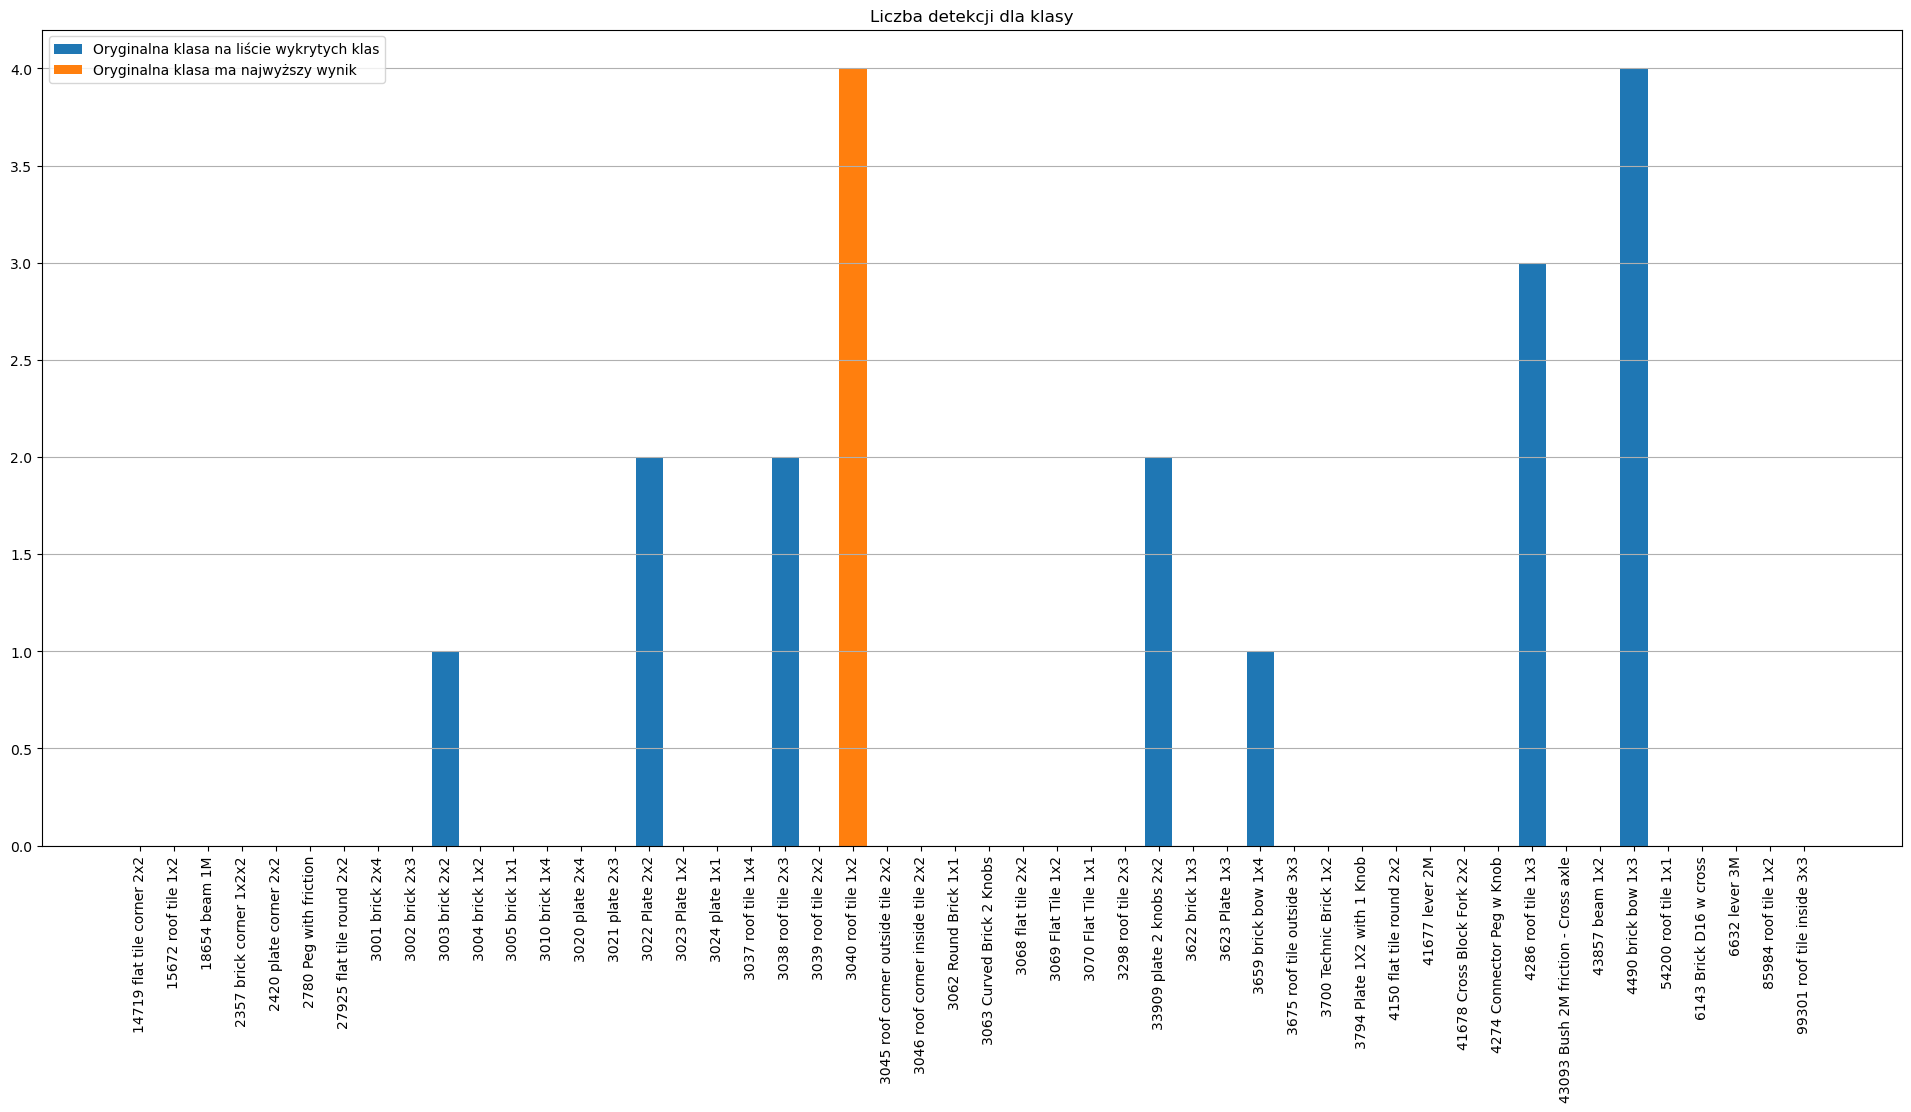

In [46]:
agg_dict = {
    "class_present": lambda z: z.sum(),
    "class_is_best": lambda z: z.sum()
}
grouped = results.groupby("original_class", as_index=False).agg(agg_dict)

figure = plt.figure(figsize=(24,12))
plt.title("Liczba detekcji dla klasy")
bar1 = plt.bar(grouped['original_class'], grouped['class_present'], label="Oryginalna klasa na liście wykrytych klas")
bar2 = plt.bar(grouped['original_class'], grouped['class_is_best'], label="Oryginalna klasa ma najwyższy wynik")
plt.legend(handles=[bar1,bar2])
figure.autofmt_xdate(rotation=90, ha='center')
plt.grid(axis='y')
plt.savefig('figure.png', pad_inches=0.1, dpi=300, bbox_inches='tight')
plt.show()
